In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

from tqdm import tqdm

import gc
import datetime

from sklearn.metrics import f1_score, log_loss
from sklearn.model_selection import KFold, StratifiedKFold
import xgboost as xgb
import lightgbm as lgb

pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100

In [3]:
train_all = pd.read_csv("../input/train_2.csv")

In [4]:
train_allT = train_all.iloc[:,:-1].T
train_allT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,145013,145014,145015,145016,145017,145018,145019,145020,145021,145022,145023,145024,145025,145026,145027,145028,145029,145030,145031,145032,145033,145034,145035,145036,145037,145038,145039,145040,145041,145042,145043,145044,145045,145046,145047,145048,145049,145050,145051,145052,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,ASTRO_zh.wikipedia.org_all-access_spider,Ahq_e-Sports_Club_zh.wikipedia.org_all-access_spider,All_your_base_are_belong_to_us_zh.wikipedia.org_all-access_spider,AlphaGo_zh.wikipedia.org_all-access_spider,Android_zh.wikipedia.org_all-access_spider,Angelababy_zh.wikipedia.org_all-access_spider,Apink_zh.wikipedia.org_all-access_spider,Apple_II_zh.wikipedia.org_all-access_spider,As_One_zh.wikipedia.org_all-access_spider,B-PROJECT_zh.wikipedia.org_all-access_spider,B1A4_zh.wikipedia.org_all-access_spider,BDSM_zh.wikipedia.org_all-access_spider,BEAST_zh.wikipedia.org_all-access_spider,BIGBANG_zh.wikipedia.org_all-access_spider,BLACK_PINK_zh.wikipedia.org_all-access_spider,BLEACH_zh.wikipedia.org_all-access_spider,BTOB_zh.wikipedia.org_all-access_spider,Beautiful_Mind_zh.wikipedia.org_all-access_spider,Beyond_zh.wikipedia.org_all-access_spider,Big_zh.wikipedia.org_all-access_spider,Block_B_zh.wikipedia.org_all-access_spider,CHAOS;CHILD_zh.wikipedia.org_all-access_spider,CHAOS;HEAD_zh.wikipedia.org_all-access_spider,CLC_zh.wikipedia.org_all-access_spider,CNBLUE_zh.wikipedia.org_all-access_spider,DIA_zh.wikipedia.org_all-access_spider,Daigo_zh.wikipedia.org_all-access_spider,Dear_My_Friends_zh.wikipedia.org_all-access_spider,Doctors_zh.wikipedia.org_all-access_spider,EGOIST_zh.wikipedia.org_all-access_spider,EXID_zh.wikipedia.org_all-access_spider,EXO_zh.wikipedia.org_all-access_spider,Energy_zh.wikipedia.org_all-access_spider,Eric_Nam_zh.wikipedia.org_all-access_spider,FAIRY_TAIL_zh.wikipedia.org_all-access_spider,FIESTAR_zh.wikipedia.org_all-access_spider,FIRST_CLASS_zh.wikipedia.org_all-access_spider,Facebook_zh.wikipedia.org_all-access_spider,Fantastic_Duo_zh.wikipedia.org_all-access_spider,Fate/Grand_Order_zh.wikipedia.org_all-access_spider,...,Referéndum_sobre_la_permanencia_del_Reino_Unido_en_la_Unión_Europea_es.wikipedia.org_all-access_...,Salida_del_Reino_Unido_de_la_Unión_Europea_es.wikipedia.org_all-access_spider,"Amar,_después_de_amar_es.wikipedia.org_all-access_spider",Anexo:89.º_Premios_Óscar_es.wikipedia.org_all-access_spider,Torneo_Clausura_2017_(México)_es.wikipedia.org_all-access_spider,Luke_Cage_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Equipo_Olímpico_de_Atletas_Refugiados_es.wikipedia.org_all-access_spider,Escuadrón_Suicida_(película)_es.wikipedia.org_all-access_spider,Moana_(película_de_2016)_es.wikipedia.org_all-access_spider,Elecciones_generales_de_España_de_2016_es.wikipedia.org_all-access_spider,La_niña_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Capitán_América:_Civil_war_es.wikipedia.org_all-access_spider,Wikipedia:Wikiconcurso/Desafíos_de_edición_WMAR_Mayo_2016_es.wikipedia.org_all-access_spider,Región_andina_(Colombia)_es.wikipedia.org_all-access_spider,Anexo:Medallero_histórico_de_los_Juegos_Olímpicos_es.wikipedia.org_all-access_spider,Chavín_(cultura)_es.wikipedia.org_all-access_spider,Winifer_Fernández_es.wikipedia.org_all-access_spider,Cazafantasmas_(película_de_2016)_es.wikipedia.org_all-access_spider,Anexo:Tenis_en_los_Juegos_Olímpicos_de_Río_de_Janeiro_2016_es.wikipedia.org

In [5]:
train_allT.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,145013,145014,145015,145016,145017,145018,145019,145020,145021,145022,145023,145024,145025,145026,145027,145028,145029,145030,145031,145032,145033,145034,145035,145036,145037,145038,145039,145040,145041,145042,145043,145044,145045,145046,145047,145048,145049,145050,145051,145052,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
2017-09-05,16,54,4,6,20,13,8,71,24,21,29,6,7,19,49,30,21,9,16,4,12,13,7,43,20,13,64,6,34,8,14,7,12,47,11,30,6,15,42,3,44,53,7,9,35,13,11,47,21,33,...,4,2,3,3,6,7,2,6,14,3,5,NaN,2,17,1,42,3,1,1,2,16,2,2,1,2,8,1,1,4,5,4,0,5,7,1,12,19,1,12,2,2,5,1,25,9,5,0,42,5,2
2017-09-06,27,25,7,16,23,20,10,44,44,32,14,12,4,25,48,66,30,16,8,15,30,17,15,40,17,21,32,6,48,13,15,17,14,20,36,34,7,12,26,9,54,35,12,13,21,23,9,54,29,35,...,2,12,9,6,3,8,3,1,18,9,2,1,1,3,2,7,1,5,1,2,19,3,0,2,7,3,1,6,5,4,5,9,8,5,3,18,22,2,14,7,2,4,5,19,8,2,5,13,8,2
2017-09-07,29,26,3,19,28,18,8,25,33,34,44,6,2,13,38,24,77,8,22,7,46,22,12,60,14,14,56,9,67,11,19,12,10,71,58,169,8,12,30,8,29,38,20,10,22,17,7,115,34,22,...,4,13,6,2,7,12,1,6,17,9,4,0,1,8,2,40,2,3,0,5,10,0,1,1,0,2,1,2,1,4,4,4,1,11,2,7,23,0,14,5,0,8,3,7,7,4,5,9,2,7
2017-09-08,23,23,4,30,14,17,5,39,52,29,62,8,6,34,85,37,32,14,12,10,19,26,18,39,15,19,62,16,29,12,12,11,11,18,27,57,9,7,34,8,19,55,12,14,11,16,14,73,39,53,...,4,22,5,6,6,11,2,5,18,6,7,1,1,6,2,15,4,4,2,3,17,5,2,1,3,5,8,3,5,4,11,5,8,22,1,14,19,2,8,4,5,7,4,14,9,4,2,21,4,6
2017-09-09,54,13,7,38,8,14,3,25,21,23,47,6,2,26,41,21,105,9,9,4,34,17,9,37,14,13,27,7,43,17,13,9,14,32,14,55,5,10,29,6,20,95,10,13,13,11,5,57,29,18,...,2,8,6,2,6,15,4,3,13,6,3,1,NaN,1,0,6,3,5,1,9,14,2,2,0,2,9,2,4,3,9,9,7,6,8,6,7,8,3,9,5,7,7,3,12,11,8,2,16,3,10


In [6]:
train_allT.reset_index(drop=True, inplace=True)
train_allT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,145013,145014,145015,145016,145017,145018,145019,145020,145021,145022,145023,145024,145025,145026,145027,145028,145029,145030,145031,145032,145033,145034,145035,145036,145037,145038,145039,145040,145041,145042,145043,145044,145045,145046,145047,145048,145049,145050,145051,145052,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
0,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,ASTRO_zh.wikipedia.org_all-access_spider,Ahq_e-Sports_Club_zh.wikipedia.org_all-access_spider,All_your_base_are_belong_to_us_zh.wikipedia.org_all-access_spider,AlphaGo_zh.wikipedia.org_all-access_spider,Android_zh.wikipedia.org_all-access_spider,Angelababy_zh.wikipedia.org_all-access_spider,Apink_zh.wikipedia.org_all-access_spider,Apple_II_zh.wikipedia.org_all-access_spider,As_One_zh.wikipedia.org_all-access_spider,B-PROJECT_zh.wikipedia.org_all-access_spider,B1A4_zh.wikipedia.org_all-access_spider,BDSM_zh.wikipedia.org_all-access_spider,BEAST_zh.wikipedia.org_all-access_spider,BIGBANG_zh.wikipedia.org_all-access_spider,BLACK_PINK_zh.wikipedia.org_all-access_spider,BLEACH_zh.wikipedia.org_all-access_spider,BTOB_zh.wikipedia.org_all-access_spider,Beautiful_Mind_zh.wikipedia.org_all-access_spider,Beyond_zh.wikipedia.org_all-access_spider,Big_zh.wikipedia.org_all-access_spider,Block_B_zh.wikipedia.org_all-access_spider,CHAOS;CHILD_zh.wikipedia.org_all-access_spider,CHAOS;HEAD_zh.wikipedia.org_all-access_spider,CLC_zh.wikipedia.org_all-access_spider,CNBLUE_zh.wikipedia.org_all-access_spider,DIA_zh.wikipedia.org_all-access_spider,Daigo_zh.wikipedia.org_all-access_spider,Dear_My_Friends_zh.wikipedia.org_all-access_spider,Doctors_zh.wikipedia.org_all-access_spider,EGOIST_zh.wikipedia.org_all-access_spider,EXID_zh.wikipedia.org_all-access_spider,EXO_zh.wikipedia.org_all-access_spider,Energy_zh.wikipedia.org_all-access_spider,Eric_Nam_zh.wikipedia.org_all-access_spider,FAIRY_TAIL_zh.wikipedia.org_all-access_spider,FIESTAR_zh.wikipedia.org_all-access_spider,FIRST_CLASS_zh.wikipedia.org_all-access_spider,Facebook_zh.wikipedia.org_all-access_spider,Fantastic_Duo_zh.wikipedia.org_all-access_spider,Fate/Grand_Order_zh.wikipedia.org_all-access_spider,...,Referéndum_sobre_la_permanencia_del_Reino_Unido_en_la_Unión_Europea_es.wikipedia.org_all-access_...,Salida_del_Reino_Unido_de_la_Unión_Europea_es.wikipedia.org_all-access_spider,"Amar,_después_de_amar_es.wikipedia.org_all-access_spider",Anexo:89.º_Premios_Óscar_es.wikipedia.org_all-access_spider,Torneo_Clausura_2017_(México)_es.wikipedia.org_all-access_spider,Luke_Cage_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Equipo_Olímpico_de_Atletas_Refugiados_es.wikipedia.org_all-access_spider,Escuadrón_Suicida_(película)_es.wikipedia.org_all-access_spider,Moana_(película_de_2016)_es.wikipedia.org_all-access_spider,Elecciones_generales_de_España_de_2016_es.wikipedia.org_all-access_spider,La_niña_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Capitán_América:_Civil_war_es.wikipedia.org_all-access_spider,Wikipedia:Wikiconcurso/Desafíos_de_edición_WMAR_Mayo_2016_es.wikipedia.org_all-access_spider,Región_andina_(Colombia)_es.wikipedia.org_all-access_spider,Anexo:Medallero_histórico_de_los_Juegos_Olímpicos_es.wikipedia.org_all-access_spider,Chavín_(cultura)_es.wikipedia.org_all-access_spider,Winifer_Fernández_es.wikipedia.org_all-access_spider,Cazafantasmas_(película_de_2016)_es.wikipedia.org_all-access_spider,Anexo:Tenis_en_los_Juegos_Olímpicos_de_Río_de_Janeiro_2016_es.wikipedia.org_al

In [7]:
first = train_allT.apply(pd.Series.last_valid_index)

In [8]:
first.shape

(145063,)

In [9]:
first.head()

0    802
1    802
2    802
3    802
4    802
dtype: int64

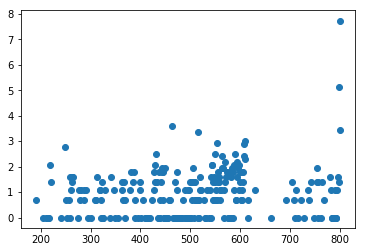

In [10]:
df = first[first != 802].to_frame()
df['cnt'] = 0
df = df.groupby(0).count().reset_index()
plt.scatter(df.loc[:,0], np.log(df.cnt))

In [11]:
df.columns

Index([0, 'cnt'], dtype='object')

In [12]:
df_first = first.to_frame()
df_first.columns=(['firstval'])
df_first['Page'] = train_all.Page
df_first.head()

,firstval,Page
0,802,2NE1_zh.wikipedia.org_all-access_spider
1,802,2PM_zh.wikipedia.org_all-access_spider
2,802,3C_zh.wikipedia.org_all-access_spider
3,802,4minute_zh.wikipedia.org_all-access_spider
4,802,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider


In [13]:
df_first.to_csv('../data/first.csv', index=False)

In [14]:
df_first[df_first.firstval != 802]

,firstval,Page
53,801,File:Ap_F23_20110324114153669.jpg_zh.wikipedia.org_all-access_spider
55,801,File:Sebastiaosalgado2006.jpg_zh.wikipedia.org_all-access_spider
175,554,load.php_zh.wikipedia.org_all-access_spider
724,430,2015年華潔洗滌罷工事件_zh.wikipedia.org_all-access_spider
913,464,马澄坤_zh.wikipedia.org_all-access_spider
1475,505,徐尚懿_zh.wikipedia.org_all-access_spider
2292,450,馬惜珍家族_zh.wikipedia.org_all-access_spider
3412,606,金雪炫_(歌手)_zh.wikipedia.org_all-access_spider
3565,801,Special:链出更改/MBK娛樂_zh.wikipedia.org_all-access_spider
3703,800,陳煒_(藝人)_zh.wikipedia.org_all-access_spider
